# Система распознования лиц

GitHub Repo - https://github.com/IgorVolochay/Face-recognition

## Requirements

* python == 3.8.5
* dlib == 19.23.1
* tensorflow == 2.2.0
* skimage == 0.19.2
* pillow == 9.0.1
* matplotlib == 3.5.2

In [1]:
import random
import os

import dlib

from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

from skimage import io
from PIL import Image, ImageFilter, ImageOps
from matplotlib import image, pyplot

### Установка предобученных моделей распознования лиц:

1. https://github.com/tzutalin/dlib-android/blob/master/data/shape_predictor_68_face_landmarks.dat
2. https://github.com/ageitgey/face_recognition_models/blob/master/face_recognition_models/models/dlib_face_recognition_resnet_model_v1.dat

In [2]:
sp = dlib.shape_predictor('shape_predictor_68_face_landmarks.dat')
facerec = dlib.face_recognition_model_v1('dlib_face_recognition_resnet_model_v1.dat')
detector = dlib.get_frontal_face_detector()

Detection 0: Left: 70 Top: 248 Right: 869 Bottom: 1047


dlib.vector([-0.0902129, -0.0284728, -0.0201088, -0.0237396, 0.0195988, -0.0624656, -0.0341601, -0.0645328, 0.145692, -0.103387, 0.164995, -0.0667768, -0.19563, -0.0463215, 0.0462609, 0.0386064, -0.204915, -0.0965468, -0.0547373, -0.130571, 0.100364, 0.0206162, -0.0427951, 0.108554, -0.284338, -0.223312, -0.115767, -0.17538, 0.0108243, -0.0472676, 0.0455159, 0.0537128, -0.0945584, 0.00360177, 0.0861953, 0.0713386, 0.0278726, -0.0417318, 0.217425, -0.0155115, -0.131425, 0.0396619, 0.0762383, 0.219826, 0.112767, 0.0618684, 0.010629, -0.050927, 0.225475, -0.277578, 0.061519, 0.183117, 0.0907261, 0.0902939, 0.156285, -0.202908, 0.049825, 0.165025, -0.225213, 0.124595, -0.00210925, -0.00164449, 0.0281997, 0.0171772, 0.118259, 0.0737286, -0.16149, -0.0689448, 0.155305, -0.175737, 0.00137892, 0.170224, -0.0961124, -0.265967, -0.20611, 0.0573926, 0.432559, 0.168564, -0.122163, 0.0571624, -0.0393574, -0.0610366, 0.071344, 0.0299074, -0.113738, -0.0179229, -0.0436408, 0.0608074, 0.205917, 0.0866

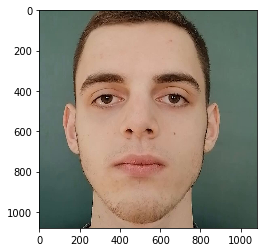

In [3]:
img = io.imread("Men1/Men1_000.jpg")
pyplot.imshow(img, interpolation='nearest')
new_img = detector(img, 1)
for k, d in enumerate(new_img):
    print("Detection {}: Left: {} Top: {} Right: {} Bottom: {}".format(
        k, d.left(), d.top(), d.right(), d.bottom()))
    shape = sp(img, d)
    
face_descriptor1 = facerec.compute_face_descriptor(img, shape)
face_descriptor1

### Формирование обучающей и тестовой выборки:

> **ToDo**: переписать блок для большей эффективности и лучшей читабельности

In [4]:
li_train = list()
li_test = list()

men1 =    ["Men1", [1, 0, 0, 0]]
men2 =    ["Men2", [0, 1, 0, 0]]
men3 =    ["Men3", [0, 0, 1, 0]]
female1 = ["Female1", [0, 0, 0, 1]]

someperson = ["SomePerson", [0, 0, 0, 0]]

for person in [men1, men2, men3, female1, someperson]:
    files_on_dir = os.listdir(person[0])
    print(f"Name: {person[0]}\nReal prediction: {person[1]}\nFiles on dir: {len(files_on_dir)}")
    
    train_threshold = len(files_on_dir) * 0.8
    for file_index in range(len(files_on_dir)):
        file_name = person[0] + "/" + files_on_dir[file_index]
        if ".jpg" in file_name:
            if file_index % 10 == 0:
                print(f"Files done: {file_index}/{len(files_on_dir)}")
                
            raw_img = io.imread(file_name)
            dtc_img = detector(raw_img, 1)
            
            for k, d in enumerate(dtc_img):
                shape = sp(raw_img, d)
            descriptor = facerec.compute_face_descriptor(raw_img, shape)
            
            if file_index <= train_threshold:
                li_train.append([descriptor, person[1]])
            else:
                li_test.append([descriptor, person[1]])

Name: Men1
Real prediction: [1, 0, 0, 0]
Files on dir: 178
Files done: 10/178
Files done: 20/178
Files done: 30/178
Files done: 40/178
Files done: 50/178
Files done: 60/178
Files done: 70/178
Files done: 80/178
Files done: 90/178
Files done: 100/178
Files done: 110/178
Files done: 120/178
Files done: 130/178
Files done: 140/178
Files done: 150/178
Files done: 160/178
Files done: 170/178
Name: Men2
Real prediction: [0, 1, 0, 0]
Files on dir: 186
Files done: 10/186
Files done: 20/186
Files done: 30/186
Files done: 40/186
Files done: 50/186
Files done: 60/186
Files done: 70/186
Files done: 80/186
Files done: 90/186
Files done: 100/186
Files done: 110/186
Files done: 120/186
Files done: 130/186
Files done: 140/186
Files done: 150/186
Files done: 160/186
Files done: 170/186
Files done: 180/186
Name: Men3
Real prediction: [0, 0, 1, 0]
Files on dir: 234
Files done: 10/234
Files done: 20/234
Files done: 30/234
Files done: 40/234
Files done: 50/234
Files done: 60/234
Files done: 70/234
Files do

In [5]:
print(len(li_train), len(li_test))

719 178


In [6]:
list_with_train_inputs = list()
list_with_train_predictions = list()
list_with_test_inputs = list()
list_with_test_predictions = list()

random.shuffle(li_train)
for i in range(len(li_train)):
    list_with_train_inputs.append(list(li_train[i][0]))
    list_with_train_predictions.append(li_train[i][1])
    
random.shuffle(li_test)
for i in range(len(li_test)):
    list_with_test_inputs.append(list(li_test[i][0]))
    list_with_test_predictions.append(li_test[i][1])
    
print(len(list_with_train_inputs), len(list_with_train_predictions), len(list_with_test_inputs), len(list_with_test_predictions))

719 719 178 178


## Нейронная сеть классификатор

In [10]:
model = Sequential()
model.add(Dense(units=256, input_shape=(len(list_with_train_inputs[0]),)))
model.add(Dropout(0.2))
model.add(Dense(units=256, input_shape=(256,), activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(units=4, input_shape=(256,)))
model.compile(loss="mean_squared_error", metrics=['accuracy'])

history = model.fit(list_with_train_inputs, list_with_train_predictions, epochs=500)

Epoch 1/500
23/23 [==============================] - 0s 2ms/step - loss: 0.0594 - accuracy: 0.8220
Epoch 2/500
23/23 [==============================] - 0s 2ms/step - loss: 0.0155 - accuracy: 0.9040
Epoch 3/500
23/23 [==============================] - 0s 2ms/step - loss: 0.0110 - accuracy: 0.9082
Epoch 4/500
23/23 [==============================] - 0s 2ms/step - loss: 0.0081 - accuracy: 0.9166
Epoch 5/500
23/23 [==============================] - 0s 2ms/step - loss: 0.0079 - accuracy: 0.9138
Epoch 6/500
23/23 [==============================] - 0s 2ms/step - loss: 0.0071 - accuracy: 0.9305
Epoch 7/500
23/23 [==============================] - 0s 2ms/step - loss: 0.0067 - accuracy: 0.9179
Epoch 8/500
23/23 [==============================] - 0s 2ms/step - loss: 0.0070 - accuracy: 0.9152
Epoch 9/500
23/23 [==============================] - 0s 2ms/step - loss: 0.0061 - accuracy: 0.9249
Epoch 10/500
23/23 [==============================] - 0s 2ms/step - loss: 0.0067 - accuracy: 0.9096
Epoch 11/

23/23 [==============================] - 0s 2ms/step - loss: 0.0035 - accuracy: 0.9221
Epoch 84/500
23/23 [==============================] - 0s 2ms/step - loss: 0.0029 - accuracy: 0.9166
Epoch 85/500
23/23 [==============================] - 0s 2ms/step - loss: 0.0034 - accuracy: 0.9082
Epoch 86/500
23/23 [==============================] - 0s 2ms/step - loss: 0.0031 - accuracy: 0.9082
Epoch 87/500
23/23 [==============================] - 0s 2ms/step - loss: 0.0031 - accuracy: 0.9166
Epoch 88/500
23/23 [==============================] - 0s 2ms/step - loss: 0.0033 - accuracy: 0.9166
Epoch 89/500
23/23 [==============================] - 0s 2ms/step - loss: 0.0034 - accuracy: 0.9110
Epoch 90/500
23/23 [==============================] - 0s 2ms/step - loss: 0.0029 - accuracy: 0.9068
Epoch 91/500
23/23 [==============================] - 0s 2ms/step - loss: 0.0029 - accuracy: 0.9152
Epoch 92/500
23/23 [==============================] - 0s 2ms/step - loss: 0.0032 - accuracy: 0.9207
Epoch 93/500


23/23 [==============================] - 0s 2ms/step - loss: 0.0026 - accuracy: 0.9152
Epoch 165/500
23/23 [==============================] - 0s 2ms/step - loss: 0.0026 - accuracy: 0.9138
Epoch 166/500
23/23 [==============================] - 0s 2ms/step - loss: 0.0025 - accuracy: 0.9110
Epoch 167/500
23/23 [==============================] - 0s 2ms/step - loss: 0.0028 - accuracy: 0.9138
Epoch 168/500
23/23 [==============================] - 0s 2ms/step - loss: 0.0026 - accuracy: 0.9124
Epoch 169/500
23/23 [==============================] - 0s 2ms/step - loss: 0.0024 - accuracy: 0.9152
Epoch 170/500
23/23 [==============================] - 0s 2ms/step - loss: 0.0028 - accuracy: 0.9110
Epoch 171/500
23/23 [==============================] - 0s 2ms/step - loss: 0.0025 - accuracy: 0.9166
Epoch 172/500
23/23 [==============================] - 0s 2ms/step - loss: 0.0028 - accuracy: 0.9110
Epoch 173/500
23/23 [==============================] - 0s 2ms/step - loss: 0.0025 - accuracy: 0.9124
Epoc

23/23 [==============================] - 0s 2ms/step - loss: 0.0023 - accuracy: 0.9082
Epoch 246/500
23/23 [==============================] - 0s 2ms/step - loss: 0.0022 - accuracy: 0.9054
Epoch 247/500
23/23 [==============================] - 0s 2ms/step - loss: 0.0025 - accuracy: 0.9068
Epoch 248/500
23/23 [==============================] - 0s 2ms/step - loss: 0.0022 - accuracy: 0.9179
Epoch 249/500
23/23 [==============================] - 0s 2ms/step - loss: 0.0023 - accuracy: 0.9124
Epoch 250/500
23/23 [==============================] - 0s 2ms/step - loss: 0.0024 - accuracy: 0.9138
Epoch 251/500
23/23 [==============================] - 0s 2ms/step - loss: 0.0023 - accuracy: 0.9166
Epoch 252/500
23/23 [==============================] - 0s 2ms/step - loss: 0.0021 - accuracy: 0.9082
Epoch 253/500
23/23 [==============================] - 0s 2ms/step - loss: 0.0024 - accuracy: 0.9207
Epoch 254/500
23/23 [==============================] - 0s 2ms/step - loss: 0.0024 - accuracy: 0.9110
Epoc

23/23 [==============================] - 0s 2ms/step - loss: 0.0022 - accuracy: 0.9138
Epoch 327/500
23/23 [==============================] - 0s 2ms/step - loss: 0.0023 - accuracy: 0.9082
Epoch 328/500
23/23 [==============================] - 0s 2ms/step - loss: 0.0021 - accuracy: 0.9152
Epoch 329/500
23/23 [==============================] - 0s 2ms/step - loss: 0.0021 - accuracy: 0.9166
Epoch 330/500
23/23 [==============================] - 0s 2ms/step - loss: 0.0023 - accuracy: 0.9193
Epoch 331/500
23/23 [==============================] - 0s 2ms/step - loss: 0.0023 - accuracy: 0.9138
Epoch 332/500
23/23 [==============================] - 0s 2ms/step - loss: 0.0022 - accuracy: 0.9124
Epoch 333/500
23/23 [==============================] - 0s 2ms/step - loss: 0.0023 - accuracy: 0.9166
Epoch 334/500
23/23 [==============================] - 0s 2ms/step - loss: 0.0024 - accuracy: 0.9124
Epoch 335/500
23/23 [==============================] - 0s 2ms/step - loss: 0.0022 - accuracy: 0.9054
Epoc

23/23 [==============================] - 0s 2ms/step - loss: 0.0023 - accuracy: 0.9207
Epoch 408/500
23/23 [==============================] - 0s 2ms/step - loss: 0.0020 - accuracy: 0.9138
Epoch 409/500
23/23 [==============================] - 0s 2ms/step - loss: 0.0023 - accuracy: 0.9124
Epoch 410/500
23/23 [==============================] - 0s 2ms/step - loss: 0.0023 - accuracy: 0.9096
Epoch 411/500
23/23 [==============================] - 0s 2ms/step - loss: 0.0020 - accuracy: 0.9068
Epoch 412/500
23/23 [==============================] - 0s 2ms/step - loss: 0.0022 - accuracy: 0.9124
Epoch 413/500
23/23 [==============================] - 0s 2ms/step - loss: 0.0022 - accuracy: 0.9138
Epoch 414/500
23/23 [==============================] - 0s 2ms/step - loss: 0.0022 - accuracy: 0.9207
Epoch 415/500
23/23 [==============================] - 0s 2ms/step - loss: 0.0020 - accuracy: 0.9193
Epoch 416/500
23/23 [==============================] - 0s 2ms/step - loss: 0.0019 - accuracy: 0.9179
Epoc

23/23 [==============================] - 0s 2ms/step - loss: 0.0020 - accuracy: 0.9124
Epoch 489/500
23/23 [==============================] - 0s 2ms/step - loss: 0.0022 - accuracy: 0.9138
Epoch 490/500
23/23 [==============================] - 0s 2ms/step - loss: 0.0020 - accuracy: 0.9138
Epoch 491/500
23/23 [==============================] - 0s 2ms/step - loss: 0.0021 - accuracy: 0.9124
Epoch 492/500
23/23 [==============================] - 0s 2ms/step - loss: 0.0019 - accuracy: 0.9166
Epoch 493/500
23/23 [==============================] - 0s 2ms/step - loss: 0.0021 - accuracy: 0.9110
Epoch 494/500
23/23 [==============================] - 0s 2ms/step - loss: 0.0021 - accuracy: 0.9179
Epoch 495/500
23/23 [==============================] - 0s 2ms/step - loss: 0.0020 - accuracy: 0.9193
Epoch 496/500
23/23 [==============================] - 0s 2ms/step - loss: 0.0019 - accuracy: 0.9082
Epoch 497/500
23/23 [==============================] - 0s 2ms/step - loss: 0.0022 - accuracy: 0.9193
Epoc

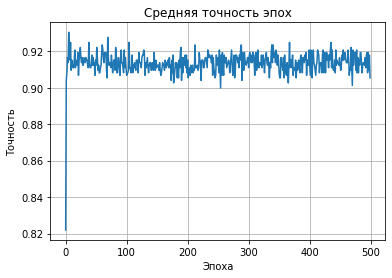

In [11]:
pyplot.plot(history.history['accuracy'])

pyplot.title('Средняя точность эпох')
pyplot.ylabel('Точность')
pyplot.xlabel('Эпоха')
pyplot.grid()

## Тестирование точности предсказаний нейронной сетиисходя из тестовой выборки

In [12]:
model.evaluate(list_with_train_inputs, list_with_train_predictions)

23/23 [==============================] - 0s 1ms/step - loss: 9.0275e-04 - accuracy: 0.9166


[0.0009027527994476259, 0.9165507555007935]